# Worksheet 5

In [1]:
%matplotlib inline

# Questions

## Question 1

Explain when multistep methods such as Adams-Bashforth are useful and when multistage methods such as RK methods are better.

## Question 2

Compute the coefficients of the AB3 algorithm.

## Question 3

Explain the meaning of stability, consistency and convergence when applied to numerical methods for IVPs. State the theorem connecting these.

## Question 4

Using the stability polynomial and your results above, check the order of accuracy and the stability of the 3 step Adams-Bashforth method.

## Coding Question 1

Apply the 2-step Adams-Bashforth method to the ODE from Worksheet 4,

$$
  y' + 2 y = 2 − e^{−4x}, \quad y(0) = 1.
$$

Use the Euler or Euler predictor-corrector method to start. Again, find the value of y(1) (analytic answer is $1 − (e^{−2} − e^{−4} )/2)$ and see how your method converges with resolution.

## Coding Question 2

# Answers

## Question 1

Explain when multistep methods such as Adams-Bashforth are useful and when multistage methods such as RK methods are better.

### Answer Question 1

Multistep methods are more computationally efficient (fewer function evaluations) and more accurate than multistage methods. However, they are not self-starting, difficult to adapt to use variable step sizes, and the theory to show that they are stable and convergent is more complex. They are most useful when efficiency is the primary concern and the system is sufficiently well controlled that equally spaced steps can be taken.

In other situations, as discussed on worksheet 4, the self-starting simplicity combined with adaptive stepping means that multistage methods are preferrable.

## Question 2

Compute the coefficients of the AB3 algorithm.

### Answer Question 2

For Adams-Bashforth methods we have

$$
  y_{n+1} = y_n + b_{k−1} f_n + b_{k−2} f_{n−1} + \dots + b_0 f_{n+1−k}.
$$

Here we have $k = 3$ and so we have

$$
  y_{n+1} = y_n + h \left[ b_2 f_n + b_1 f_{n−1} + b_0 f_{n−2} \right] .
$$

We want to ensure that this gives an exact approximation of the integral form for polynomials of
order s = $0, \dots, 2$. That is, we want

$$
  \int^{x_{n+1}}_{x_n} p_s (x) = h \left[ b_2 p_s (x_n) + b_1 p_s (x_{n−1}) + b_0 p_s (x_{n−2}) \right].
$$

For simplicity, and without loss of generality, we set $x_n = 0$, and use the polynomials

$$
\begin{aligned}
  p_0(x) & = 1, \\
  p_1(x) & = x, \\
  p_2(x) & = x ( x + h )
\end{aligned}
$$

We then see that we get 

$$
\begin{aligned}
  s & = 0: &   \int_0^h 1 & = h \left[ b_2 \times 1 + b_1 \times 1 + b_0 \times 1 \right] \\
  \implies &&           1 & = b_2 + b_1 + b_0. \\
  s & = 1: &   \int_0^h x & = h \left[ b_2 \times 0 + b_1 \times (-h) + b_0 \times (-2 h) \right] \\
  \implies && \frac{1}{2} & = -b_1 - 2 b_0. \\
  s & = 2: & \int_0^h x ( x + h ) & = h \left[ b_2 \times 0 + b_1 \times 0 + b_0 \times (-2 h) (-h) \right] \\
  \implies && \frac{5}{6} & = 2 b_0. 
\end{aligned}
$$

By back-substitution we find

$$
  b_0 = \frac{5}{12}, \quad b_1 = -\frac{4}{3}, \quad b_2 = \frac{23}{12}.
$$

This means the algorithm is

$$
  y_{n+1} = y_n + \frac{h}{12} \left[ 23 f_n − 16 f_{n−1} + 5 f_{n−2} \right].
$$

## Question 3

Explain the meaning of stability, consistency and convergence when applied to numerical methods for IVPs. State the theorem connecting these.

### Answer Question 3

*Stability*: The numerical solution is bounded at all iterations over a finite interval. I.e., if the true solution is $y(x)$ and $x \in [0, X]$ with $X$ finite, and we use $N + 1$ steps with $x_0 = 0$ and $x_N = X$, then $|y_i|$ is finite for all $i = 0, 1, \dots , N$, irrespective of the value of $N$.

*Consistency*: The numerical method is a faithful representation of the differential equation to lowest order in $h$. That is, if you Taylor expand the numerical difference scheme and let $h \to 0$ you recover the original differential equation independent of the limiting process.

*Convergence*: If $y(x)$ is the exact solution and $y(x; h)$ the numerical solution using step size $h$, in the limit as $h \to 0$ the numerical solution is the exact solution:

$$
 \lim_{h \to 0} y(x; h) = y(x).
$$

The theorem states that consistency and stability are equivalent to convergence.

## Question 4

Using the stability polynomial and your results above, check the order of accuracy and the stability of the 3 step Adams-Bashforth method.

### Answer Question 4

The coefficients of AB3 in the standard $k$-step formula notation are

$$
\begin{aligned}
  a_3 & = 1 & a_2 & = -1 & a_1 & = 0 & a_0 & = 0 \\
  b_3 & = 0 & b_2 & = \frac{23}{12} & b_1 & = -\frac{4}{3} & b_0 & = \frac{5}{12}.
\end{aligned}
$$

Therefore the stability polynomial is

$$
  p(z) = z^3 - z^2
$$

with derivative

$$
  p'(z) = 3 z^2 - 2 z
$$

and the other required polynomial is

$$
  q(z) = \frac{1}{12} \left( 23 z^2 - 16 z + 5 \right).
$$

To check consistency we need that $p(1) = 0$ and $p'(1) = q(1)$, which we check:

$$
\begin{aligned}
  p(1) & = 1 - 1 \\ & = 0. \\
  p'(1) - q(1) & = (3 - 2) - \frac{1}{12} (23 -16 + 5) \\ & = 1 - \frac{12}{12} \\ & = 0.
\end{aligned}
$$

So the method is consistent.

To check stability we have to find the roots of the stability polynomial $p(z)$. We write

$$
  p(z) = z^2 (z − 1)
$$

to see that the roots are 0 (twice) and 1, which means that the method satisfies the *strong* root condition implying both stability and relative stability, meaning it is a useful method.


## Coding Question 1

Apply the 2-step Adams-Bashforth method to the ODE from Worksheet 4,

$$
  y' + 2 y = 2 − e^{−4x}, \quad y(0) = 1.
$$

Use the Euler or Euler predictor-corrector method to start. Again, find the value of y(1) (analytic answer is $1 − (e^{−2} − e^{−4} )/2)$ and see how your method converges with resolution.

### Answer Coding Question 1

Error at the end point is  [  1.51015867e-05]


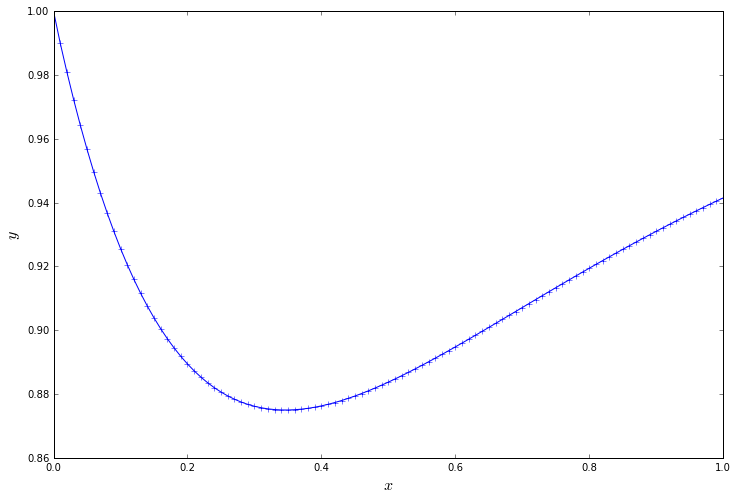

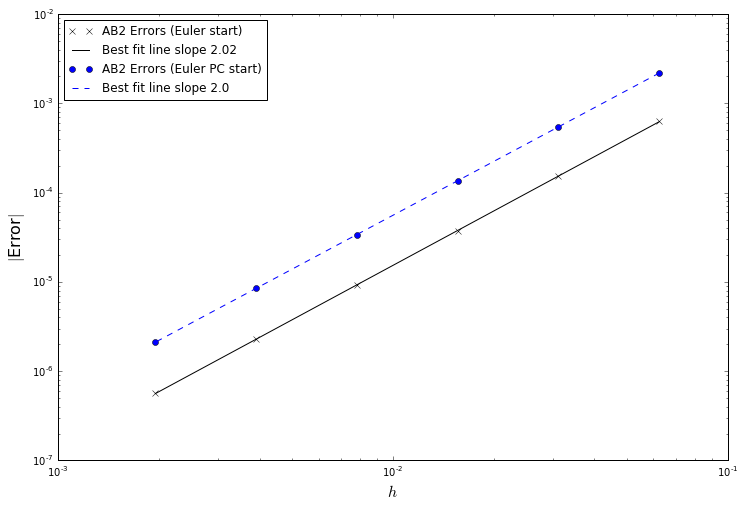

In [2]:
import numpy
from matplotlib import pyplot

def AB2(f, y0, interval, N = 100, start = 'Euler'):
    """
    Solve the IVP y' = f(x, y) on the given interval using N+1 points
    (counting the initial point) with initial data y0.
    """
    
    h = (interval[1] - interval[0]) / N
    x = numpy.linspace(interval[0], interval[1], N+1)
    y = numpy.zeros((len(y0), N+1))
    ff = numpy.zeros((len(y0), N+1))
    y[:, 0] = y0
    ff[:, 0] = f(x[0], y[:, 0])
    
    if (start == 'Euler'):
        y[:, 1] = y0 + h * ff[:, 0]
    elif (start == 'Euler PC'):
        yp = y0 + h * ff[:, 0]
        y[:, 1] = y0 + h * ( ff[:, 0] + f(x[1], yp) ) / 2.0 
    else:
        raise Exception("Only allowed values for start are "
                        "['Euler', 'Euler PC']")
    ff[:, 1] = f(x[1], y[:, 1])
    
    for i in range(1, N):
        y[:, i+1] = y[:, i] + h * ( 3.0 * ff[:, i] - ff[:, i-1] ) / 2.0
        ff[:, i+1] = f(x[i+1], y[:, i+1])
    
    return x, y

def fn_q1(x, y):
    """
    Function defining the IVP in question 1.
    """
    
    return 2.0 - numpy.exp(-4.0*x) - 2.0*y

# Now do the test

exact_y_end = 1.0 - (numpy.exp(-2.0) - numpy.exp(-4.0)) / 2.0

# Test at default resolution
x, y = AB2(fn_q1, numpy.array([1.0]), [0.0, 1.0])
print("Error at the end point is ", y[:, -1] - exact_y_end)

fig = pyplot.figure(figsize = (12, 8), dpi = 50)
pyplot.plot(x, y[0, :], 'b-+')
pyplot.xlabel('$x$', size = 16)
pyplot.ylabel('$y$', size = 16)

# Now do the convergence test
levels = numpy.array(range(4, 10))
Npoints = 2**levels
abs_err_Euler   = numpy.zeros(len(Npoints))
abs_err_EulerPC = numpy.zeros(len(Npoints))
for i in range(len(Npoints)):
    x, y = AB2(fn_q1, numpy.array([1.0]), [0.0, 1.0], Npoints[i])
    abs_err_Euler[i] = abs(y[0, -1] - exact_y_end)
    x, y = AB2(fn_q1, numpy.array([1.0]), [0.0, 1.0], Npoints[i],
               'Euler PC')
    abs_err_EulerPC[i] = abs(y[0, -1] - exact_y_end)

# Best fit to the errors
h = 1.0 / Npoints
p_Euler = numpy.polyfit(numpy.log(h), numpy.log(abs_err_Euler), 1)
p_EulerPC = numpy.polyfit(numpy.log(h), numpy.log(abs_err_EulerPC), 1)

fig = pyplot.figure(figsize = (12, 8), dpi = 50)
pyplot.loglog(h, abs_err_Euler, 'kx')
pyplot.loglog(h, numpy.exp(p_Euler[1]) * h**(p_Euler[0]), 'k-')
pyplot.loglog(h, abs_err_EulerPC, 'bo')
pyplot.loglog(h, numpy.exp(p_EulerPC[1]) * h**(p_EulerPC[0]), 'b--')
pyplot.xlabel('$h$', size = 16)
pyplot.ylabel('$|$Error$|$', size = 16)
pyplot.legend(('AB2 Errors (Euler start)',
               "Best fit line slope {0:.3}".format(p_Euler[0]),
               'AB2 Errors (Euler PC start)',
               "Best fit line slope {0:.3}".format(p_EulerPC[0])),
              loc = "upper left")

pyplot.show()

Both converge at order two: oddly, the results starting with the Euler predictor-corrector are noticeably worse.

## Coding Question 2

Apply the 2-step implicit Adams-Moulton method to the above ODE, using the 2-step Adams-Bashforth method as a predictor. Use the Euler or Euler predictor-corrector method to start. See how your method converges with resolution.

### Answer Coding Question 3

Error at the end point is  [  1.51015867e-05]


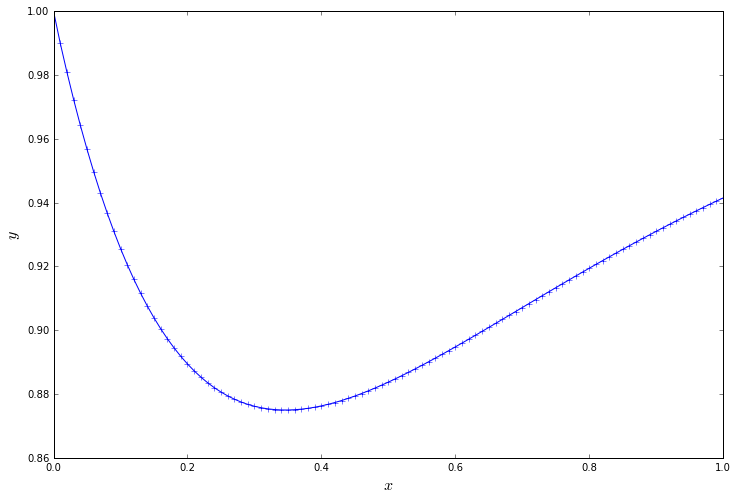

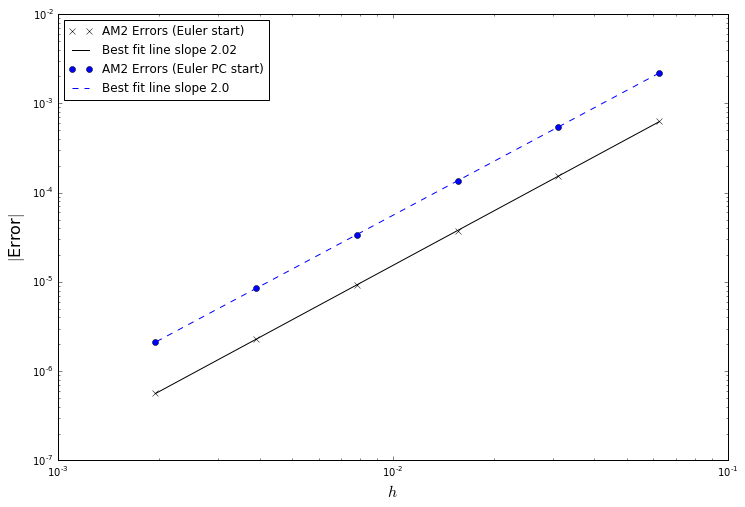

In [3]:
def AM2(f, y0, interval, N = 100, start = 'Euler'):
    """
    Solve the IVP y' = f(x, y) on the given interval using N+1 points
    (counting the initial point) with initial data y0.
    """
    
    h = (interval[1] - interval[0]) / N
    x = numpy.linspace(interval[0], interval[1], N+1)
    y = numpy.zeros((len(y0), N+1))
    ff = numpy.zeros((len(y0), N+1))
    y[:, 0] = y0
    ff[:, 0] = f(x[0], y[:, 0])
    
    if (start == 'Euler'):
        y[:, 1] = y0 + h * ff[:, 0]
    elif (start == 'Euler PC'):
        yp = y0 + h * ff[:, 0]
        y[:, 1] = y0 + h * ( ff[:, 0] + f(x[1], yp) ) / 2.0 
    else:
        raise Exception("Only allowed values for start are "
                        "['Euler', 'Euler PC']")
    ff[:, 1] = f(x[1], y[:, 1])
    
    for i in range(1, N):
        # Adams-Bashforth 2 for the predictor step
        yp = y[:, i] + h * ( 3.0 * ff[:, i] - ff[:, i-1] ) / 2.0
        # Adams-Moulton 2 for the corrector step
        y[:, i+1] = h * (ff[:, i] + f(x[i+1], yp)) / 2.0
        ff[:, i+1] = f(x[i+1], y[:, i+1])
    
    return x, y

def fn_q2(x, y):
    """
    Function defining the IVP in question 2.
    """
    
    return 2.0 - numpy.exp(-4.0*x) - 2.0*y

# Now do the test

exact_y_end = 1.0 - (numpy.exp(-2.0) - numpy.exp(-4.0)) / 2.0

# Test at default resolution
x, y = AB2(fn_q2, numpy.array([1.0]), [0.0, 1.0])
print("Error at the end point is ", y[:, -1] - exact_y_end)

fig = pyplot.figure(figsize = (12, 8), dpi = 50)
pyplot.plot(x, y[0, :], 'b-+')
pyplot.xlabel('$x$', size = 16)
pyplot.ylabel('$y$', size = 16)

# Now do the convergence test
levels = numpy.array(range(4, 10))
Npoints = 2**levels
abs_err_AM2_Euler   = numpy.zeros(len(Npoints))
abs_err_AM2_EulerPC = numpy.zeros(len(Npoints))
for i in range(len(Npoints)):
    x, y = AB2(fn_q2, numpy.array([1.0]), [0.0, 1.0], Npoints[i])
    abs_err_AM2_Euler[i] = abs(y[0, -1] - exact_y_end)
    x, y = AB2(fn_q2, numpy.array([1.0]), [0.0, 1.0], Npoints[i],
               'Euler PC')
    abs_err_AM2_EulerPC[i] = abs(y[0, -1] - exact_y_end)

# Best fit to the errors
h = 1.0 / Npoints
p_Euler = numpy.polyfit(numpy.log(h), numpy.log(abs_err_AM2_Euler), 1)
p_EulerPC = numpy.polyfit(numpy.log(h), numpy.log(abs_err_AM2_EulerPC), 1)

fig = pyplot.figure(figsize = (12, 8), dpi = 50)
pyplot.loglog(h, abs_err_AM2_Euler, 'kx')
pyplot.loglog(h, numpy.exp(p_Euler[1]) * h**(p_Euler[0]), 'k-')
pyplot.loglog(h, abs_err_AM2_EulerPC, 'bo')
pyplot.loglog(h, numpy.exp(p_EulerPC[1]) * h**(p_EulerPC[0]), 'b--')
pyplot.xlabel('$h$', size = 16)
pyplot.ylabel('$|$Error$|$', size = 16)
pyplot.legend(('AM2 Errors (Euler start)',
               "Best fit line slope {0:.3}".format(p_Euler[0]),
               'AM2 Errors (Euler PC start)',
               "Best fit line slope {0:.3}".format(p_EulerPC[0])),
              loc = "upper left")

pyplot.show()

The results are essentially identical to Adams-Bashforth 2.